#### Data Science HW1

In [1]:
import ipywidgets as widgets
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
%matplotlib inline

Loading image from the local machine

In [2]:
Image("img.jpg")

NameError: name 'Image' is not defined

Loading image from the web

In [6]:
Image(url="https://www.mattpaynephotography.com/images/xl/Lighting-up-the-Cherry-Blossoms.jpg")

##### Some math formula which I picked from my deep learning clas

$ t \leq \frac{R^2\norm{\mathbf{w^*}}^2}{\rho^2}$

Here, $t$ is the number of at most iterations a perceptron model takes to converge given a linearly seperable data

$R$ is the maximum norm in the vector training samples

$\rho$ is the dot product of optimal weights $W*$ and training samples

#### Python programming

In [29]:
print("hello world")

hello world


In [31]:
s = "I go to school at PSU and OHSU"

In [33]:
s.lower()

'i go to school at psu and ohsu'

In [34]:
s.split()

['I', 'go', 'to', 'school', 'at', 'PSU', 'and', 'OHSU']

In [27]:
x = [23,98,38,9]
y = [item**4 for item in x]

In [35]:
#using a lambda function
list(map(lambda x: x*2,y))

[559682, 184473632, 4170272, 13122]

In [57]:
z = list(np.linspace(1,2,10))
z

[1.0,
 1.1111111111111112,
 1.2222222222222223,
 1.3333333333333333,
 1.4444444444444444,
 1.5555555555555556,
 1.6666666666666665,
 1.7777777777777777,
 1.8888888888888888,
 2.0]

In [68]:
while len(z) > 0:
    z.pop()
z

[]

Machine learning is something which I'm interested in, so I worked out a SVM model which I learned in my machine learning class last quarter at PSU

Loading and splitting the data

In [65]:
spam_data = pd.read_csv("spambase.data")
X = spam_data.iloc[:,:-1]
y = spam_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_train_scaled = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
### We are using a linear SVM to classify our data
clf = LinearSVC()
clf.fit(X_train_scaled, y_train)

print(f"Accuracy: {clf.score(X_test_scaled, y_test)}")
print(f"Precision: {precision_score(y_test,clf.predict(X_test_scaled))}")
print(f"Recall: {recall_score(y_test,clf.predict(X_test_scaled))}")

Accuracy: 0.9156521739130434
Precision: 0.9082240762812872
Recall: 0.8668941979522184


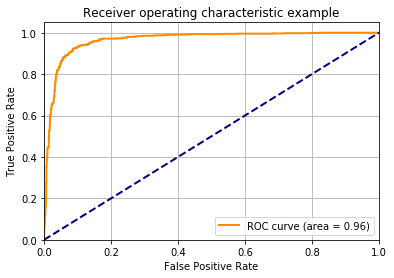

In [67]:
fpr, tpr, thresholds = roc_curve(y_test, clf.fit(X_train_scaled, y_train).decision_function(X_test_scaled))
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()